In [114]:
import warnings
from timy.settings import timy_config

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
timy_config.tracking = False

In [115]:
from dtextract.data.data import ID, NUM, CAT_RES

output = 'logs/nltk_movie_reviews_3000_features.txt'  # The log file in which the log of running code will be written
path = '../data/nltk_movie_reviews_3000_features.csv'  # Path to the input dataset in csv format
data_types = [ID] * 1 + [NUM] * 3000 + [CAT_RES]
has_header = True
isClassify = True 
class_names = {'neg': 0, 'pos': 1}


In [116]:
# decision tree extraction parameters
nComponents = 350  # Number of components (the gaussian mixtures)
maxSize = 64  # maximum tree size
nPts = 1000  # Number of points used in active sampling
nTestPts = 500  # Number of test points used in Active sampling
maxDtSize = maxSize  # decision tree training parameters
tgtScore = None
minGain = 1e-4

# random forest parameters
nTrees = 100 

# training data proportion
trainingProp = 0.7


In [117]:
from dtextract.util.log import *
from dtextract.data.data import readCsv

setCurOutput(output)
log('Parsing CSV...', INFO)
(df, res, resMap, catFeats, columnNames) = readCsv(path, has_header, data_types)
log('Done!', INFO)


Parsing CSV...
Reading file: ../data/nltk_movie_reviews_3000_features.csv
Done!
Rows read: 2000
Columns: 3001
Column names:
0: 000
1: 10
2: 100
3: 12
4: 13
5: 13th
6: 15
7: 17
8: 1960
9: 1981
10: 1987
11: 1992
12: 1993
13: 1994
14: 1995
15: 1996
16: 1997
17: 1998
18: 1999
19: 20
20: 200
21: 30
22: 3000
23: 35
24: 40
25: 50
26: 60
27: 80
28: 80s
29: 90
30: 90s
31: abilities
32: ability
33: able
34: absent
35: absolutely
36: absurd
37: academy
38: accent
39: accept
40: acceptable
41: accident
42: accidentally
43: achievement
44: act
45: acted
46: acting
47: action
48: actions
49: actor
50: actors
51: actress
52: actresses
53: acts
54: actual
55: actually
56: ad
57: adam
58: adams
59: adaptation
60: adapted
61: add
62: added
63: adding
64: addition
65: adds
66: adequate
67: admit
68: admits
69: admittedly
70: ads
71: adult
72: advantage
73: adventure
74: adventures
75: advice
76: affair
77: affected
78: affleck
79: aforementioned
80: afraid
81: african
82: age
83: agent
84: agents
85: age

In [118]:
from dtextract.data.data import split
log('Splitting into training and test...', INFO)
(trainDf, testDf) = split(df, trainingProp)
log('Done!', INFO)


Splitting into training and test...
Done!


In [119]:
from dtextract.data.data import constructDataMatrix
log('Constructing data matrices...', INFO)
(XTrain, yTrain, catFeatIndsTrain, numericFeatIndsTrain) = constructDataMatrix(trainDf, res, catFeats)
(XTest, yTest, catFeatIndsTest, numericFeatIndsTest) = constructDataMatrix(testDf, res, catFeats)
log('Done!', INFO)



Constructing data matrices...
Done!


In [120]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

log('Training random forest...', INFO)
rfConstructor = RandomForestClassifier if isClassify else RandomForestRegressor
rf = rfConstructor(n_estimators=nTrees)
rf.fit(XTrain, yTrain)
log('Done!', INFO)



Training random forest...
Done!


In [121]:
from dtextract.util.util import f1Vec, mseVec

rfScoreFunc = f1Vec if isClassify else mseVec
rfTrainScore = rfScoreFunc(rf.predict, XTrain, yTrain)
rfTestScore = rfScoreFunc(rf.predict, XTest, yTest)
log('Training score: ' + str(rfTrainScore), INFO)
log('Test score: ' + str(rfTestScore), INFO)


Training score: 1.0
Test score: 0.8021390374331552


In [122]:
from dtextract.core.learn import ParamsLearn
from dtextract.impl.simp import ParamsSimp
from dtextract.impl.funcs import getRfFunc

# Step 2: Set up decision tree extraction inputs
paramsLearn = ParamsLearn(tgtScore, minGain, maxSize)
paramsSimp = ParamsSimp(nPts, nTestPts, isClassify)

# Step 3: Function
rfFunc = getRfFunc(rf)


In [123]:
from dtextract.impl.dists import CategoricalGaussianMixtureDist as CGMD
dist = CGMD(XTrain, catFeatIndsTrain, numericFeatIndsTrain, nComponents)


Fitting Gaussian mixture with 350 components...
Done!


In [124]:
from dtextract.impl.simp import learnDTSimp, genAxisAligned

# Step 5: Extract decision tree
dtExtract, dtMap = learnDTSimp(genAxisAligned, rfFunc, dist, paramsLearn, paramsSimp)


Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 1.0000000000000007
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.7660000000000006
Computed leaf score: 0.7570000000000006
Putting gain: 0.009000000000000008
Internal node index: 0
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.9680502413980423
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.7444306356350946
Computed leaf score: 0.7192613293587454
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.031949758601958374
Sampling 1000 test points
Done! Sampled 1000 test points
Computed interna

Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.7854469317921966
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.6692007858869515
Computed leaf score: 0.6707716797505359
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.008278006005538015
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.0072101432308236115
Computed leaf score: 0.0064651226903251905
Current gain: 0.005556074564584179
Current score: 0.8402388820362005
Current size: 23
Internal node index: 16
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.021852479374240626
Sampling 1000 test points
Done! Sa

Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.04457198612590757
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.03681646053999965
Computed leaf score: 0.03628159670648876
Current gain: 0.001701076415731577
Current score: 0.8628454188274848
Current size: 43
Internal node index: 67
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.015425161833716929
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.01442252631452533
Computed leaf score: 0.013975196621347538
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.0015020833707107756
Sampling 1000 test points
Done! S

Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.0005424394769476384
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.000429069626265582
Computed leaf score: 0.00041442376038799576
Sampling 1000 points
Done! Sampled 1000 points
Generating internal node with number of samples 1000...
Done!
Generating leaf with number of samples 1000...
Done!
Current mass: 0.016069051031151194
Sampling 1000 test points
Done! Sampled 1000 test points
Computed internal score: 0.015297736581655936
Computed leaf score: 0.01521739132650018
Current gain: 0.00031561831965387817
Current score: 0.8707800314551339
Current size: 65
Reached maximum size, ending!
Leaf node index: 80
Leaf node index: 271
Leaf node index: 160
Leaf node index: 6
Leaf node index: 41
Leaf node index: 23
Leaf node index: 1279
Leaf node index: 2562
Leaf node index: 34
Leaf node index: 137
Leaf node i

Trained proposed decision tree:
Node count: 65


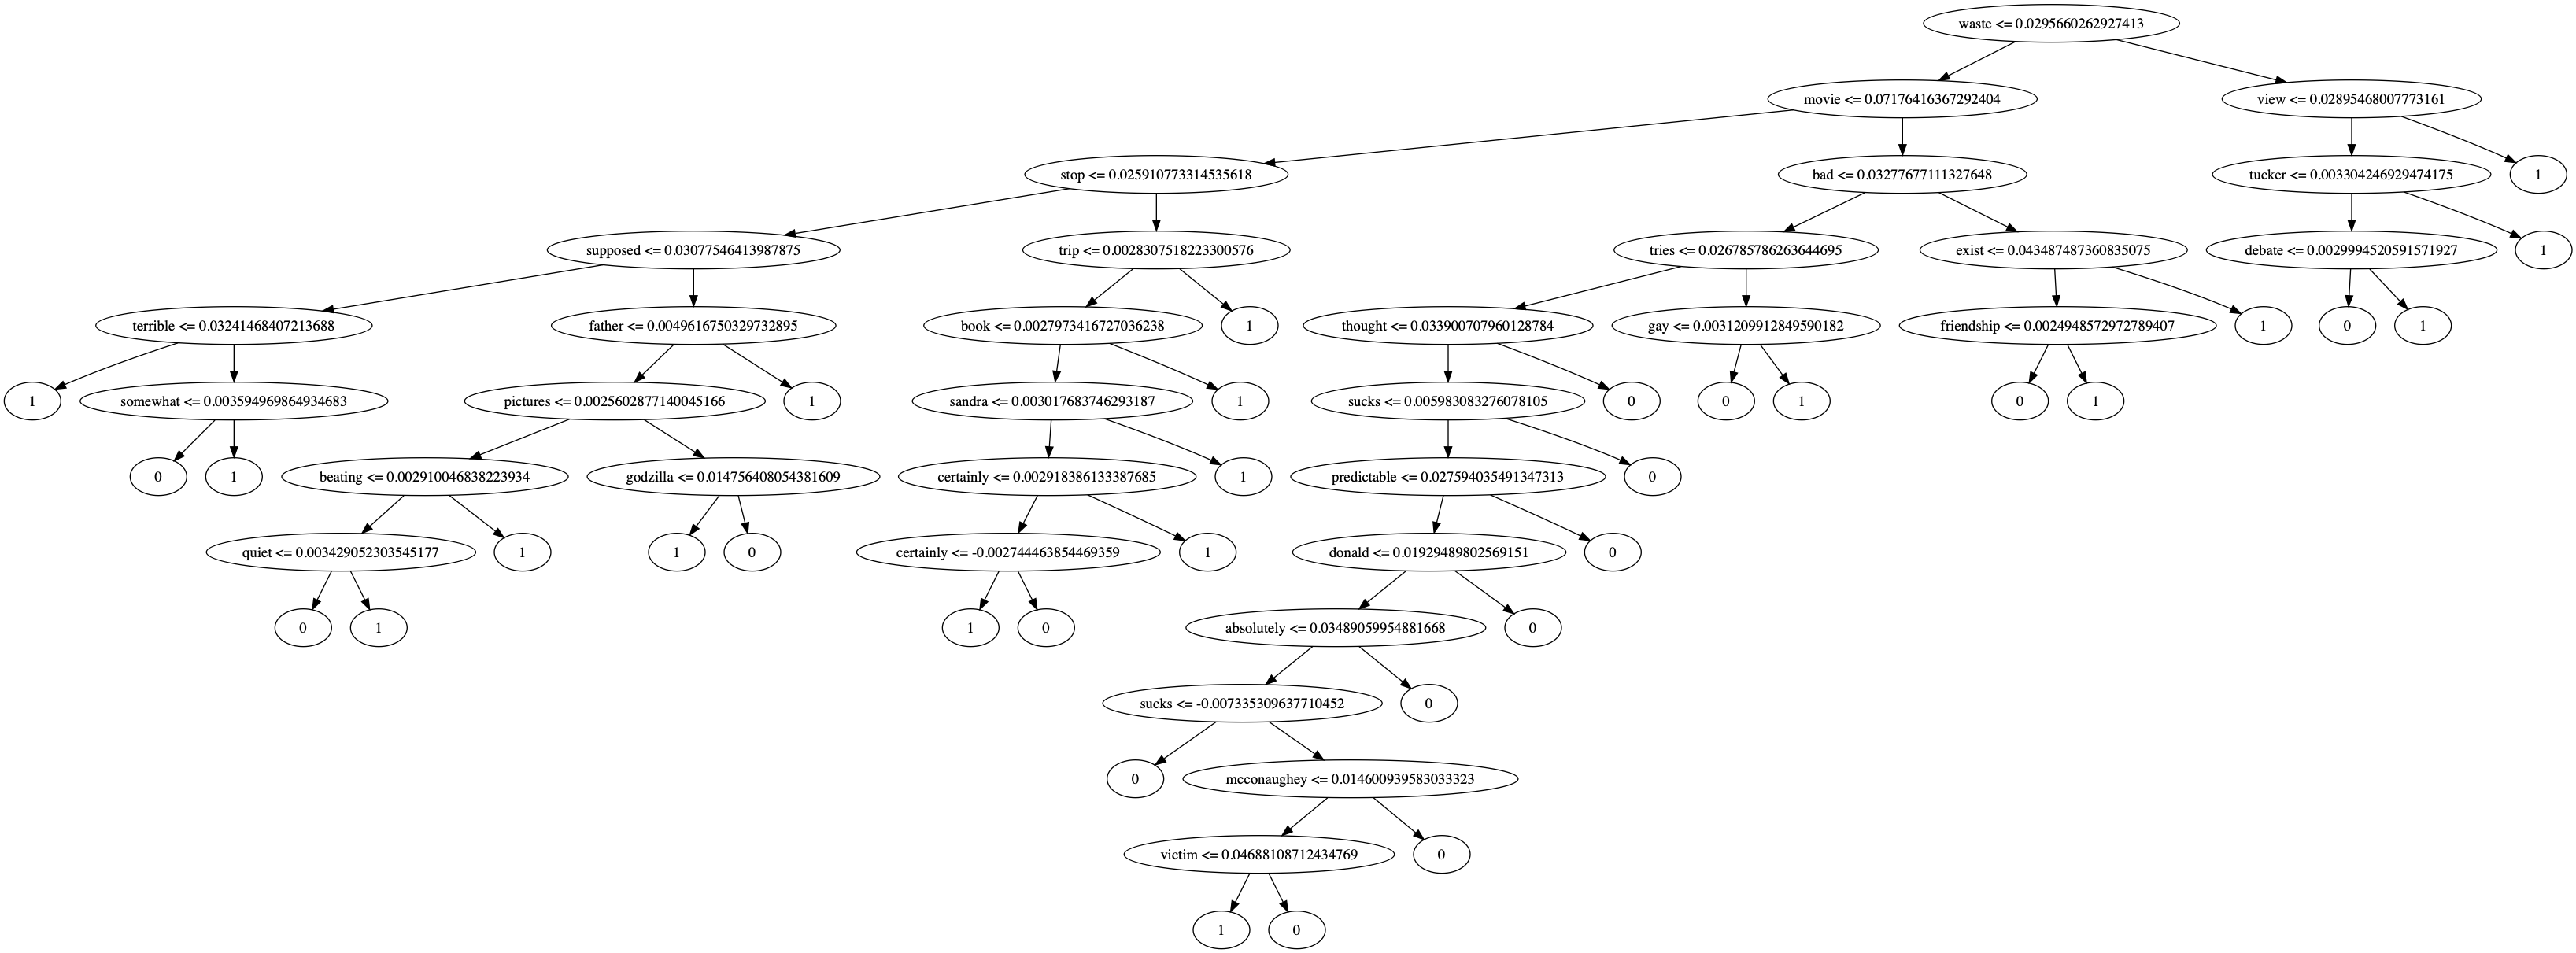

In [125]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
log('Trained proposed decision tree:', INFO)
log('Node count: ' + str(dtExtract.nNodes()), INFO)

graphviz_data = dtExtract.toDotGraph(hasHeader=has_header, columnNames=columnNames)
graph = pydotplus.graph_from_dot_data(graphviz_data)
Image(graph.create_png())


In [126]:
from dtextract.util.util import f1, mse

scoreFunc = f1 if isClassify else mse

dtExtractRelTrainScore = scoreFunc(dtExtract.eval, XTrain, rf.predict(XTrain))
dtExtractRelTestScore = scoreFunc(dtExtract.eval, XTest, rf.predict(XTest))

log('Relative training score: ' + str(dtExtractRelTrainScore), INFO)
log('Relative test score: ' + str(dtExtractRelTestScore), INFO)

dtExtractTrainScore = scoreFunc(dtExtract.eval, XTrain, yTrain)
dtExtractTestScore = scoreFunc(dtExtract.eval, XTest, yTest)

log('Training score: ' + str(dtExtractTrainScore), INFO)
log('Test score: ' + str(dtExtractTestScore), INFO)


Relative training score: 0.7224043715846995
Relative test score: 0.6666666666666667
Training score: 0.7224043715846995
Test score: 0.6552631578947369


In [127]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Step 6: Train a (greedy) decision tree
log('Training greedy decision tree', INFO)
maxLeaves = (maxDtSize + 1)//2
dtConstructor = DecisionTreeClassifier if isClassify else DecisionTreeRegressor
dtTrain = dtConstructor(max_leaf_nodes=maxLeaves)
dtTrain.fit(XTrain, rfFunc(XTrain))
log('Done!', INFO)
log('Node count: ' + str(dtTrain.tree_.node_count), INFO)


Training greedy decision tree
Done!
Node count: 63


In [128]:
dtTrainRelTrainScore = scoreFunc(lambda x: dtTrain.predict(x.reshape(1, -1)), XTrain, rf.predict(XTrain))
dtTrainRelTestScore = scoreFunc(lambda x: dtTrain.predict(x.reshape(1, -1)), XTest, rf.predict(XTest))

log('Relative training score: ' + str(dtTrainRelTrainScore), INFO)
log('Relative test score: ' + str(dtTrainRelTestScore), INFO)


Relative training score: 0.8314447592067988
Relative test score: 0.6814310051107326


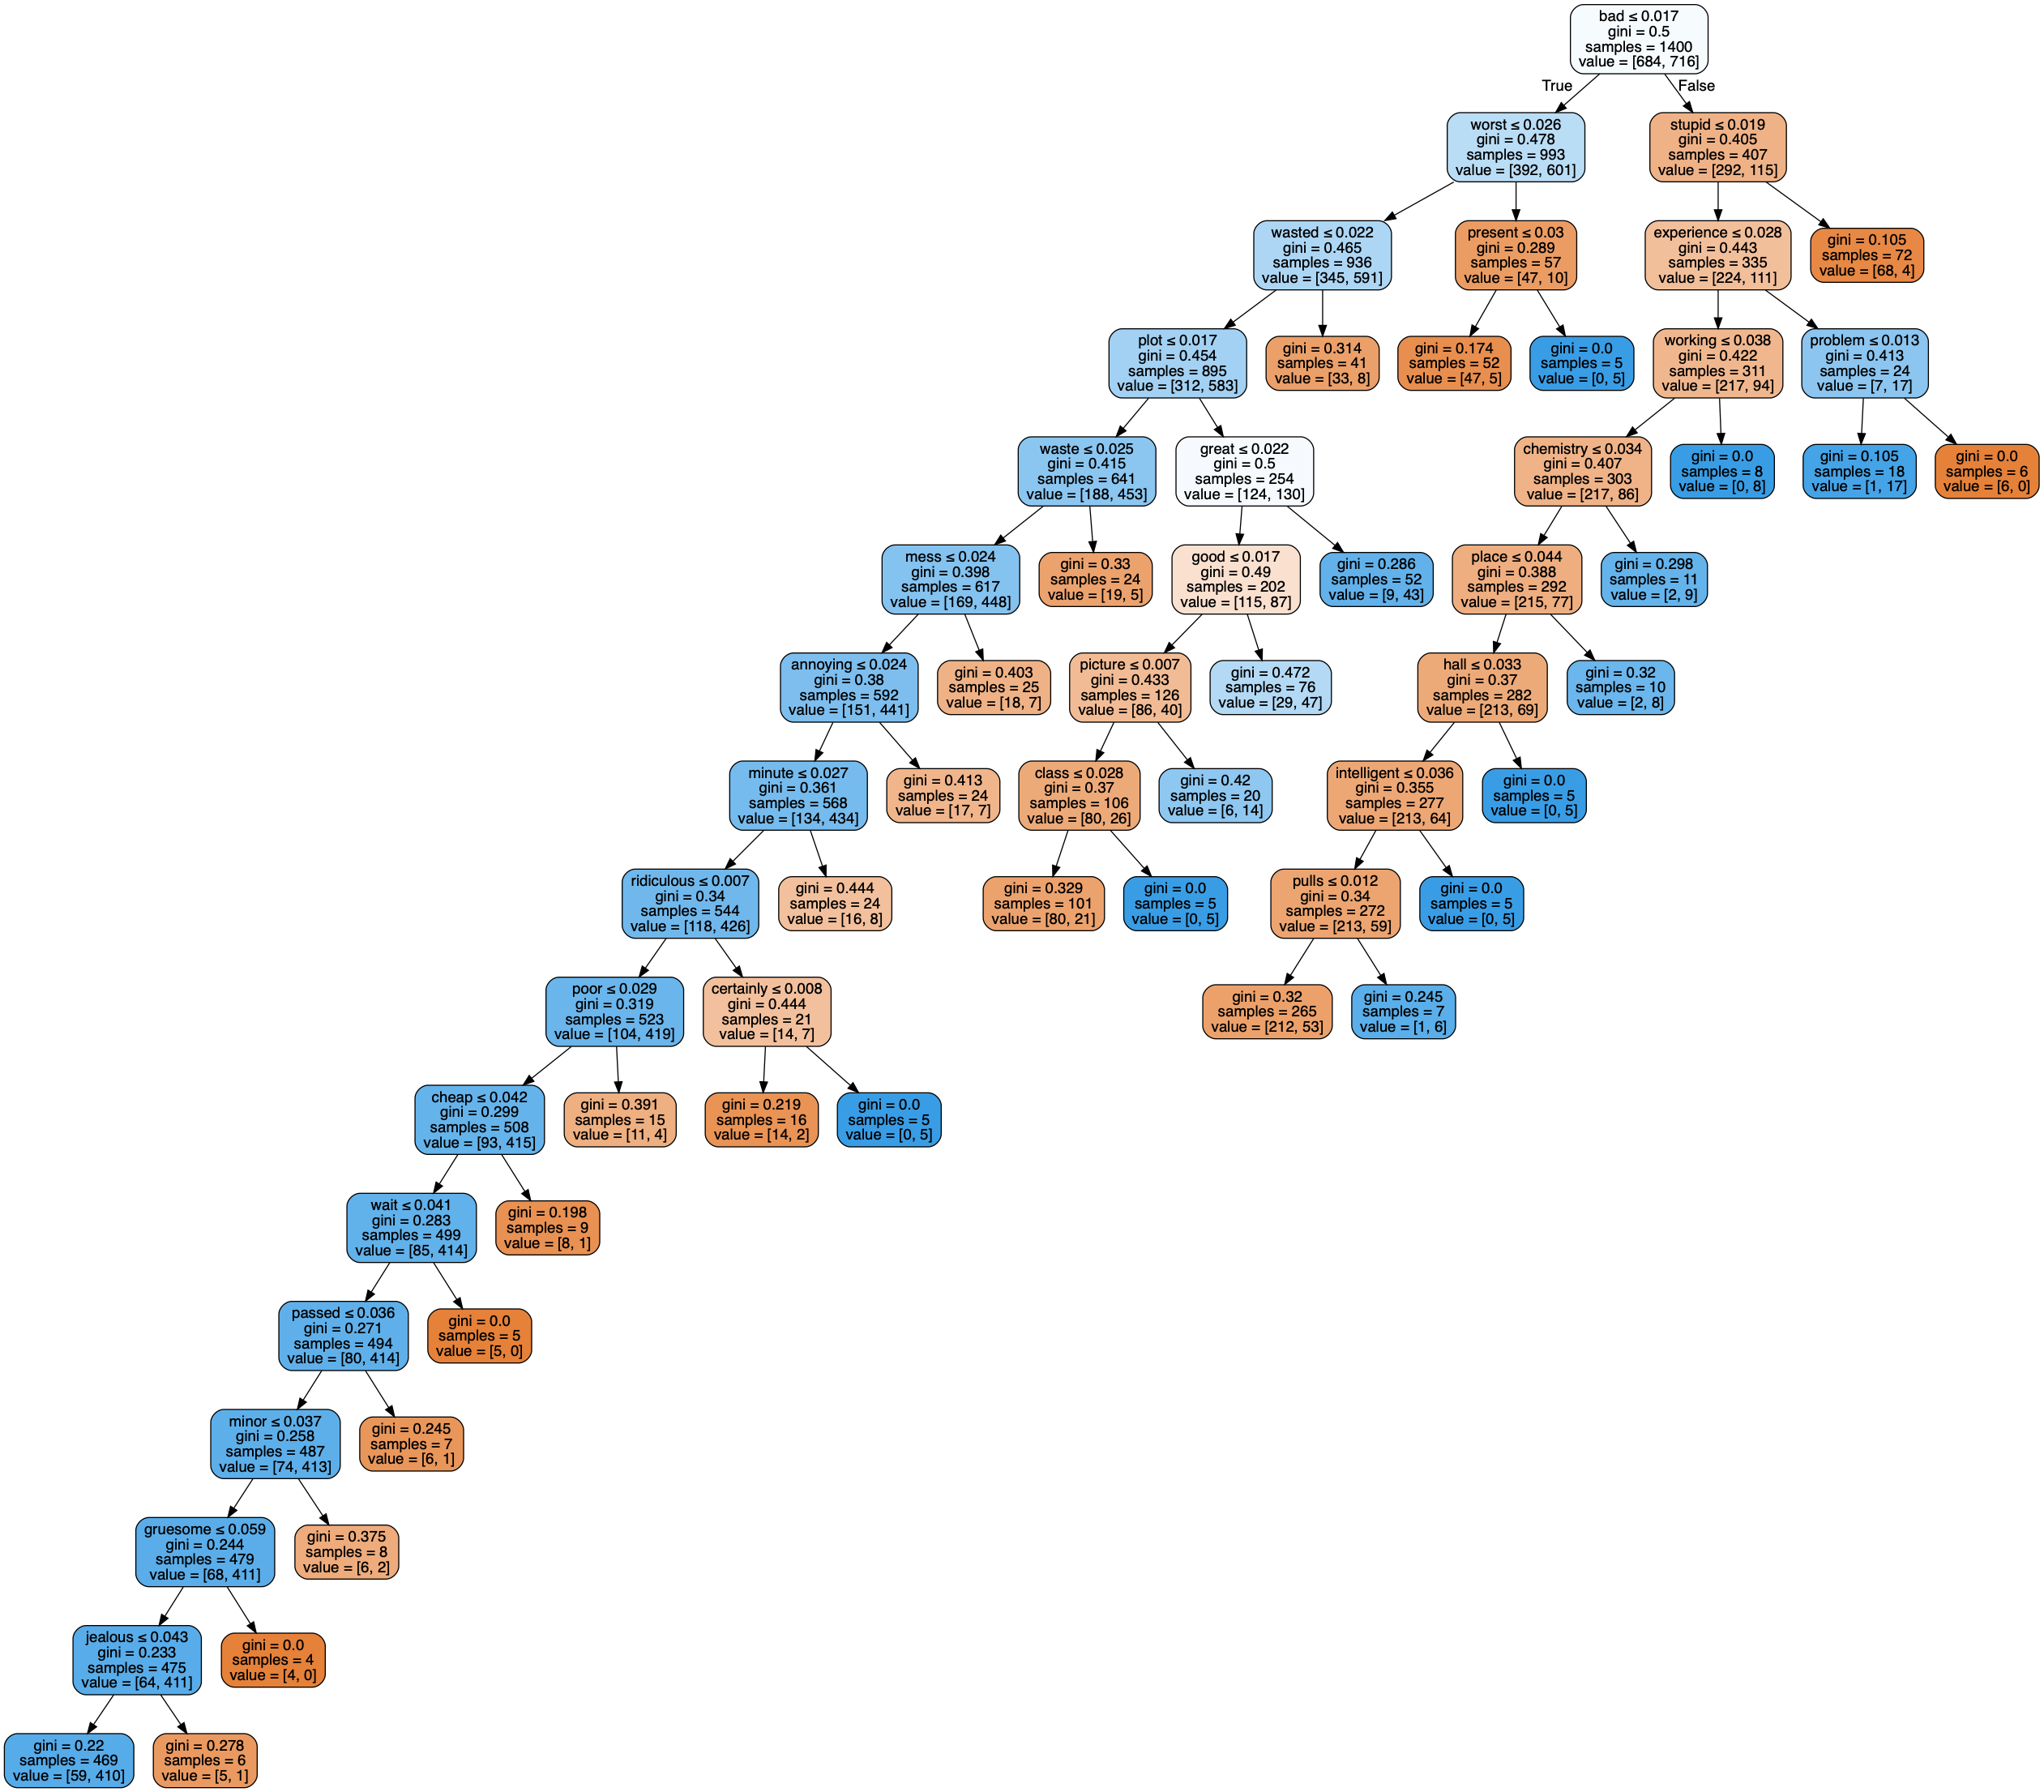

In [129]:
from sklearn.externals.six import StringIO  

dot_data = StringIO()
export_graphviz(dtTrain, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=columnNames[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [130]:
dtTrainTrainScore = scoreFunc(lambda x: dtTrain.predict(x.reshape(1, -1)), XTrain, yTrain)
dtTrainTestScore = scoreFunc(lambda x: dtTrain.predict(x.reshape(1, -1)), XTest, yTest)
    
log('Training score: ' + str(dtTrainTrainScore), INFO)
log('Test score: ' + str(dtTrainTestScore), INFO)


Training score: 0.8314447592067988
Test score: 0.6565656565656566


In [131]:
from dtextract.interpreter.dt_interpreter import *

predictions, biases, contributions = interpret_tree(dtExtract, dtMap, XTest, yTest)
assert_interpretation(predictions, biases, contributions)
    

Classes count is 2
Biases:
[[0.52666667 0.47333333]
 [0.52666667 0.47333333]
 [0.52666667 0.47333333]
 ...
 [0.52666667 0.47333333]
 [0.52666667 0.47333333]
 [0.52666667 0.47333333]]
Line shape is: (3000, 2)
Contibs:
[array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]]), array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
      

In [132]:
descriptions = ''
if has_header:
    # NOTE: here you should trim the headers array to be the array of names of input columns 
    # with the same size as the number of columns. for example if the first row is and id row 
    # and the last row is the label row, you can use: 
    headers = list(pd.read_csv(path))[1:-1]
    headers = np.array(headers)
    exps = interpret_samples(rf, dtExtract, XTest, contributions, labels=headers)
    for i in range(len(exps)):
        descriptions += exps[i].get_description(5, True, headers)
else:
    exps = interpret_samples(rf, dtExtract, XTest, contributions)
    for i in range(len(exps)):
        descriptions += exps[i].get_description(5)
        

In [133]:
from importlib import reload
from dtextract.interpreter.visualize import text_visualizer as tv
reload(tv)
tv.init_notebook_visualization()

classes = {0: 'Negative', 1: 'Positive'}

ind = 0
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

1993 action actress ago amazing america bad barry based better big bomb boss bringing buy called career case check comedy continues convince course crime criminal danny definitely depth despite determined devil director doesn dollars entertaining experience fame far fiction films finds fortune game gene getting goes going got grade guess hackman halloween hollywood honest horror humor intelligent interesting isn john kind know las learned level like line look make martin masterpiece matters means money movie movies named near note notice novel obvious originality people point project pulp question robin role scene scream seen sets sexual size somewhat soon soul star starring straight suddenly sure talented talking tarantino tension think tony track travolta trying unlike used ve vegas violence want wants weird words works year yes
##################################################


In [134]:
ind = 10
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

17 achievement acting arm attempt bad basic believe better big bodies body brain breasts brings budget called case character characters cinematography cliches clothes collection contains conventional credits dark decent deep described dialogue director does doesn doing dramatic elizabeth end erotic exactly excessive excuse eyes fact fake fantasy films going graphic gross half heroine hey high history hits hold holding hollywood hoping hour imagine industry instinct intellectual intelligence intelligent joe kill lacks las laughable laughing level life light like line lines ll local makes making mirror moment money naked new nudity occasionally old past pathetic paul people perform plot point porn previously problem profanity public qualities quick really recall rent results review reviews save scenes screams screenwriter script selling sexual short simply single situations smile somebody sound start stereotypes store story strange stupidity suggest sympathy terrible time total truth try

In [137]:
ind = 24
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

50 acting actors america arguably attacks bad big black bomb bring brought bunch center certain character city classic comes cult cut day degree dialogue does dog drag effects eye faces fi films following giant godzilla going good hank hard head horrible hour intelligence interested just laugh leave lines long looking lost mad make making man matter matthew mind money movie movies original picture previous quite read reason reputation right role roll ruin say scene sci set short simple size somewhat special spent stop storyline stumbles suit summer television thing think time understand ve viewing walking wondering word worst years
##################################################


In [139]:
ind = 101
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

accidentally action actors actually admit american americans anger apparently appearance aren arts attempt attempts avoids away beating beginning better big bit box boxing bringing cameo caught certainly chan chance character china chinese cinematography circumstances clear climactic come comedic comedy comes concerned count course cover credits days decide deserves developed does doing dozen draw drunk end ends enjoyed ensues entirely especially eventually evil exception execution expected expecting explosions fact fair far father featured fellow fight fighting fights figure filmed films fine forget form friends general genius getting girlfriend god goes going good grand guard hard having heard help hilarious hong hot hurt husband idea ii iii including incredibly instead involving isn jackie just kind know kong large later learned leave let like likely limited line literally little ll looking love main make making man martial master match matter mention merely mind minutes missing mod

In [140]:
ind = 102
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

anymore aside audience aware away basically believable bit bunch career caught computer crimes didn expect extreme extremely familiar far fbi fellow female films follows generally goes greater greatest guilty hack hollywood ill impossible incredibly just killer knows later lee list little look looking lord makes matthew meets miller minute movie movies murphy obviously oh old opens phantom picks played plot point portrayed probably public real reality really regular ridiculous running said say staying stupid sub suggest sum technology terrible thanks think time times tries trying turned use usually ve waste wide woo world year years young
##################################################


In [141]:
ind = 103
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

100 15 20 actions actually anybody audience away bad beat better big bit body bright bring camera changed character characters classic cliche completely computer considering constantly couple crash cut danger day decisions degenerates didn different director doesn dog dollars don door double downhill dressed drunk early emotional end ending ends entire escape evidence exactly example expensive extremely eye eyed faces fact failed falling features feeling feet fell felt finally generated given goes going gonna got group guy guys happy head hear highlight hit hole hollywood hope hours idea ill instance island jason just keanu kept killed lack later lead left like little live ll long look looked looks losing lost make maybe middle million minutes model moment money movie nice oh opening original people perfect performance point points poor problem progresses putting range real realistic really reeves reminds run safe said sandra saw say seat second seen sequel sequence sequences seriously

In [142]:
ind = 104
tv.visualize_normal(columnNames, biases[ind], predictions[ind], exps[ind], classes)

able accept action actor actors aging approach attempt best big bobby brother budget business called cameo cameos camera cartoon cause character clever clueless comedy comic complete conscience conspiracy creating crew decides deliver department determined did different direct director directors discover does doing door eddie employee ending enjoy entertainment equally especially evil ex exact exactly extreme failing famous fed field figures follows footage force friendship fun funny going good great guy hidden hilarious holding hollywood hot important importantly industry jimmy joy kind king lacks leading like likeable line little los low make makes making man martin massive maybe member members message money movie murphy order people perfect performances peter picture playing plays plot popular prisoner problem process producer producers promises real really reason recent refuses remember repetitive rob role roles saw screenplay seriously shot solid star stars steve stop story street